# Game of Life

The [game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) simulates the dynamics of some living species according to a few simple rules devised by the British mathematician [J. H. Conway](https://en.wikipedia.org/wiki/John_Horton_Conway). The dynamics unfolds on a square lattice of cells which can either be populated or unpopulated. The rules for the time evolution are as follows:

1. A populated cell will become unpopulated in the next generation if it has less than two
   populated neighbors.
1. A populated cell will be populated in the next generation if it has two or three 
   populated neighbors.
1. A populated cell will become unpopulated in the next generation if it has more than    
   three populated neighbors.
1. An unpopulated cell will become populated in the next generation if exactly three of its  
   neighbors are populated.
   
These rules can be motivated by a minimum of populated neighboring cells needed for reproduction and a maximum of populated neighboring cells to avoid starvation from overpopulation. The rules can be stated in a simpler form as:

A cell will be populated in the next generation if

* it is presently populated and has two populated neighboring cells
* independently of its present state, it has three populated neighboring cells

In all other cases, the cell will be unpopulated in the next generation. The update from generation to generation has to be done for all cells in a single step.

In a first step, one needs to implement an update to the next generation in an efficient way. We store the present state of the population on the lattice in a Numpy array where a populated cell is denoted by 1 while an unpopulated cell is denoted by 0. A second Numpy array of the same size is generated where each entry contains the number of populated neighbors of that entry in the original array.

In order to determine the number of occupied neighbors, we make use of [`scipy.signal.convolve2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html#scipy.signal.convolve2d) from the [Scipy library](https://docs.scipy.org/doc/scipy/reference/). Take a look at the documentation to familiarize yourself with the `convolve2d` function. If you are not familiar with the concept of convolution, take a look [here](~Convolution.ipynb).

The following hints might be useful:

* The number of (populated or unpopulated) neighbors is 8.
* Use periodic boundary condition when determining the number of neighbors.
* A test for equality can be performed on a complete array, resulting in a Boolean array.
* Boolean `and` and `or` can be performed on whole arrays by means of `&` and `|`, 
  respectively.
* Avoid creating new arrays as this is expensive in compute time.

In [29]:
def update(world):
    """determine the next generation in the game of life
    
       The state of the population is stored in the 2d array
       'world'. The number of neighbors is obtained by means
       of scipy.signal.convolve2d with periodic boundary
       conditions.
       
    """
    ### BEGIN SOLUTION
    v = np.array([[1, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
    nr_neighbors = signal.convolve2d(world, v, mode='same', boundary='wrap')
    world = world & (nr_neighbors == 2)
    world = world | (nr_neighbors == 3)
    return world
    ### END SOLUTION

In [30]:
result = update(np.zeros((10, 10), dtype=np.int8))
assert result is not None, 'It seems that you do not return a result.'
assert isinstance(result, np.ndarray), 'It seems that you do not return a Numpy array.'

In [4]:
%matplotlib notebook
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


class Conway:
    configs = {'blinker': [[1, 1, 1]],
               'toad': [[1, 1, 1, 0],
                        [0, 1, 1, 1]],
               'glider': [[1, 0, 0],
                          [0, 1, 1],
                          [1, 1, 0]],
               'beacon': [[0, 0, 0, 0, 0, 0],
                          [0, 1, 1, 0, 0, 0],
                          [0, 1, 1, 0, 0, 0],
                          [0, 0, 0, 1, 1, 0],
                          [0, 0, 0, 1, 1, 0],
                          [0, 0, 0, 0, 0, 0]],
               'pulsar': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
                          [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
                          [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
                          [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                          [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
                          [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
                          [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
               'pentadecathlon': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]                               
              }
    
    v = np.array([[1, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
    
    def __init__(self, size=100, initial=None, x0=0, y0=0):
        self.size = size
        self.set_initial(initial, x0, y0)
        
    def set_initial(self, initial, x0, y0):
        if initial is None:
            self.world = np.random.randint(0, 2, (self.size, self.size))
        else:
            try:
                config = self.configs[initial]
            except KeyError:
                raise KeyError('initial configuration {} not found'.format(initial))
            else:
                self.world = np.zeros((self.size, self.size), dtype=np.int8)
                self.world[x0:x0+len(config), y0:y0+len(config[0])] = config
                
    def updatefig(self, *args):
        n = signal.convolve2d(self.world, self.v, mode='same', boundary='wrap')
        self.world = self.world & (n == 2)
        self.world = self.world | (n == 3)
        self.im.set_array(self.world)
        return self.im,
    
    def animate(self, **kwargs):
        print(kwargs)
        fig = plt.figure()
        self.im = plt.imshow(self.world, animated=True)
        self.ani = FuncAnimation(fig, self.updatefig, **kwargs)
        plt.show()

{'interval': 200}


<IPython.core.display.Javascript object>


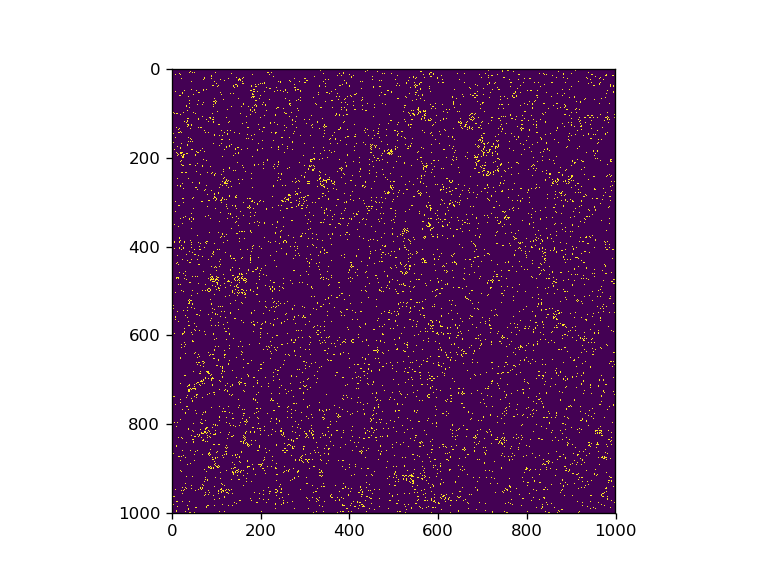

In [10]:
c = Conway(1000, None, x0=15, y0=15)
c.animate(interval=200)